In [9]:
import sys
import os

# Add the 'scripts' directory to the Python path
sys.path.append(os.path.abspath(os.path.join('..', 'scripts')))
from load_data import load_data

# Define your SQL query
query = "SELECT * FROM public.xdr_data"  # Replace with your actual table name


# Load data into a DataFrame
data = load_data(query)
data.columns

Index(['Bearer Id', 'Start', 'Start ms', 'End', 'End ms', 'Dur. (ms)', 'IMSI',
       'MSISDN/Number', 'IMEI', 'Last Location Name', 'Avg RTT DL (ms)',
       'Avg RTT UL (ms)', 'Avg Bearer TP DL (kbps)', 'Avg Bearer TP UL (kbps)',
       'TCP DL Retrans. Vol (Bytes)', 'TCP UL Retrans. Vol (Bytes)',
       'DL TP < 50 Kbps (%)', '50 Kbps < DL TP < 250 Kbps (%)',
       '250 Kbps < DL TP < 1 Mbps (%)', 'DL TP > 1 Mbps (%)',
       'UL TP < 10 Kbps (%)', '10 Kbps < UL TP < 50 Kbps (%)',
       '50 Kbps < UL TP < 300 Kbps (%)', 'UL TP > 300 Kbps (%)',
       'HTTP DL (Bytes)', 'HTTP UL (Bytes)', 'Activity Duration DL (ms)',
       'Activity Duration UL (ms)', 'Dur. (ms).1', 'Handset Manufacturer',
       'Handset Type', 'Nb of sec with 125000B < Vol DL',
       'Nb of sec with 1250B < Vol UL < 6250B',
       'Nb of sec with 31250B < Vol DL < 125000B',
       'Nb of sec with 37500B < Vol UL',
       'Nb of sec with 6250B < Vol DL < 31250B',
       'Nb of sec with 6250B < Vol UL < 37500B',


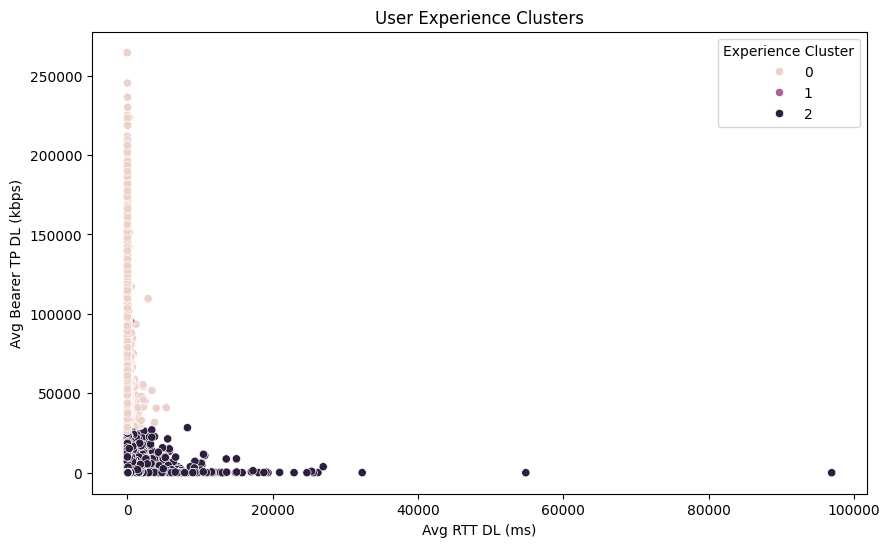

In [10]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans



# Handle missing values only for numeric columns
numeric_columns = data.select_dtypes(include=['float64', 'int64']).columns
data[numeric_columns] = data[numeric_columns].fillna(data[numeric_columns].mean())

# Step 1: Aggregate metrics per user
user_data = data.groupby('MSISDN/Number').agg({
    'TCP DL Retrans. Vol (Bytes)': 'mean',
    'Avg RTT DL (ms)': 'mean',  # Use the correct RTT column
    'Handset Type': 'first',  # Corrected column name for handset type
    'Avg Bearer TP DL (kbps)': 'mean'
}).reset_index()

# Step 2: Identify top, bottom, and most frequent values
top_tcp = user_data['TCP DL Retrans. Vol (Bytes)'].nlargest(10)
bottom_tcp = user_data['TCP DL Retrans. Vol (Bytes)'].nsmallest(10)
most_frequent_tcp = user_data['TCP DL Retrans. Vol (Bytes)'].mode()

# Step 3: Clustering using K-means
features = ['TCP DL Retrans. Vol (Bytes)', 'Avg RTT DL (ms)', 'Avg Bearer TP DL (kbps)']
scaler = StandardScaler()
scaled_features = scaler.fit_transform(user_data[features])

kmeans = KMeans(n_clusters=3)
user_data['Experience Cluster'] = kmeans.fit_predict(scaled_features)

# Visualizing the clusters
plt.figure(figsize=(10, 6))
sns.scatterplot(x='Avg RTT DL (ms)', y='Avg Bearer TP DL (kbps)', hue='Experience Cluster', data=user_data)
plt.title("User Experience Clusters")
plt.show()
